In [1]:
import pickle
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
% matplotlib inline

In [39]:
raw_guardian = pd.read_pickle('news_dfs/new_guardian_df.pkl')
guardian = raw_guardian[(raw_guardian.year == 2016)& (raw_guardian.month != 9)]

# Topic Modeling

In [57]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.4, min_df = 15,
                                   stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(guardian.article)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components = 52, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

In [58]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic:" + str(int(topic_idx)+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [59]:
transformed_data = nmf.transform(tfidf)
len(transformed_data)

2396

# Top Words per Topic

In [60]:
print_top_words(nmf, tfidf_feature_names, 20)


Topic:1
says family like photograph home world old day 000 life dont work city war british public say way did long
Topic:2
refugees greece turkey asylum eu refugee greek migrants europe border syrians seekers migration deal crisis syrian athens european germany 000
Topic:3
syrian syria aleppo assad talks al opposition ceasefire mistura geneva aid regime humanitarian civilians russia rebel russian damascus areas bashar
Topic:4
zika virus mosquito microcephaly health disease cases pregnant infected brazil mosquitoes infection spread symptoms brain babies transmission birth women outbreak
Topic:5
saudi arabia yemen arms nimr saudis shia al uk coalition riyadh sales export licences execution international law iran weapons military
Topic:6
children calais camp refugees unaccompanied uk child refugee jungle camps minors french migrants britain families help europe vulnerable amendment living
Topic:7
turkey turkish coup erdogan gulen turkeys ankara istanbul erdogans military kurdish pkk journ

# Labels for Topics

In [21]:
topics = {1:'Other', 2:'EU Refugee Crisis',
         3:'Syria',4:'Zika',
          5: 'Saudi Arabia', 6: 'EU Refugee Crisis',
          7: 'Turkey Coup', 8: "Women's Rights",
          9: 'Drugs', 10: 'Iran',
          11: 'ISIS', 12: 'NATO',
          13: 'Christianity', 14: 'El Chapo',
          15: 'Ireland', 16: "Brussels Attack",
          17: 'Panama Papers', 18: 'Israel/Palestine',
          19: 'Pope Francis', 20: 'Russia',
          21: 'China', 22: 'Israel',
          23: 'Spanish Government Deadlock', 24: 'Other',
          25: 'Libya', 26: "EgyptAir Crash",
         27: 'Puerto Rico Debt', 28: 'Other', 
         29: 'Muslim Women Rights', 30: 'Other',
         31: 'France', 32: 'Brazil Corruption',
         33: 'Doublin: Romulus Shooting', 34: 'Orlando Shootings',
         35: 'Police' , 36: 'Iraq', 
         37: 'Burkini Ban' , 38: 'Egypt: Italian Student Death', 
         39: 'Taliban', 40: 'Cuba',
         41: 'Surveillance', 42: 'Schools',
         43: 'Earthquakes', 44: 'Zoo',
         45: 'Brexit', 46: 'Venezuela',
         47: 'Nice Attack', 48: 'Canada', 
         49: 'Fort McMurray Fire', 50: 'Trials',
         51: 'Mexico', 52: 'North Korea'}

## Data Cleaning

In [ ]:
final_data = pd.DataFrame(transformed_data).applymap(lambda x: 1 if x>0.2 else 0)
final_data.columns = topics.values()
final_data['month'] = [i for i in guardian.month]

by_month = final_data.groupby('month').sum()
for i in range(8):
    by_month.iloc[i] = by_month.iloc[i]/float(np.sum(by_month.iloc[i]))

In [380]:
by_month.to_pickle('guardian_month.pkl')

In [2]:
by_month = pd.read_pickle('guardian_month.pkl')

# Top Topic per Month

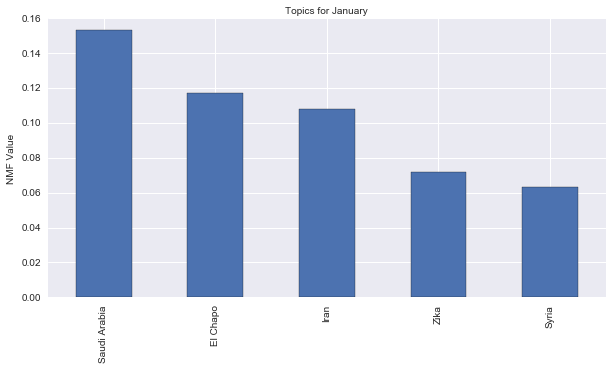

In [14]:
# El Chapo
# Orlando Shooting
rc={'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.labelsize': 10, 'font.size': 10, 'legend.fontsize': 30.0, 'axes.titlesize': 10, "figure.figsize": [10, 5]}
sns.set(rc = rc)
by_month.iloc[0].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for January')

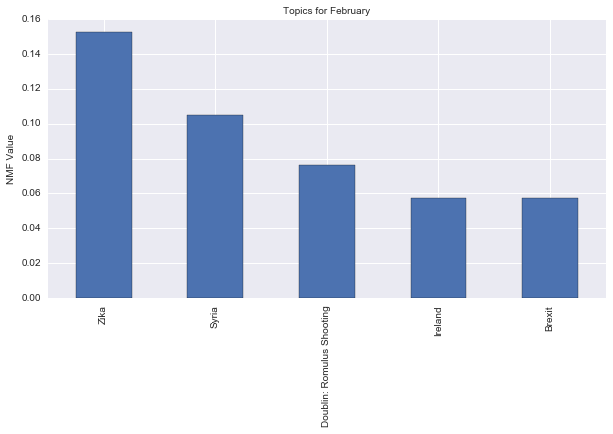

In [15]:
# El Chapo
# Orlando Shooting
by_month.iloc[1].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for February')

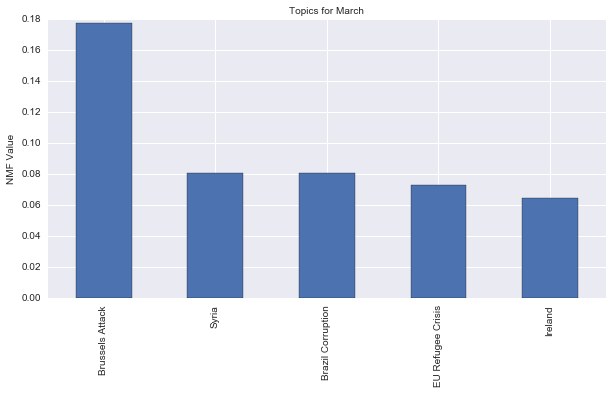

In [16]:
# El Chapo
# Orlando Shooting
by_month.iloc[2].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for March')

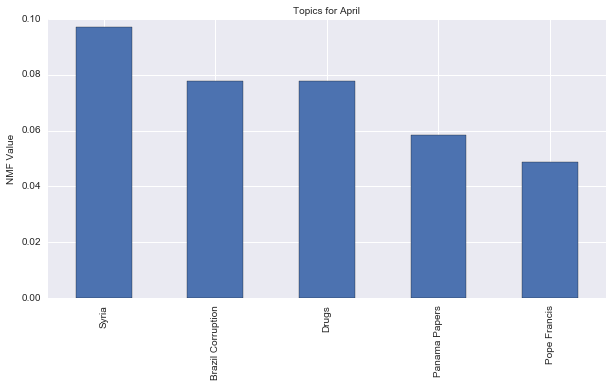

In [17]:
# El Chapo
# Orlando Shooting
by_month.iloc[3].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for April')

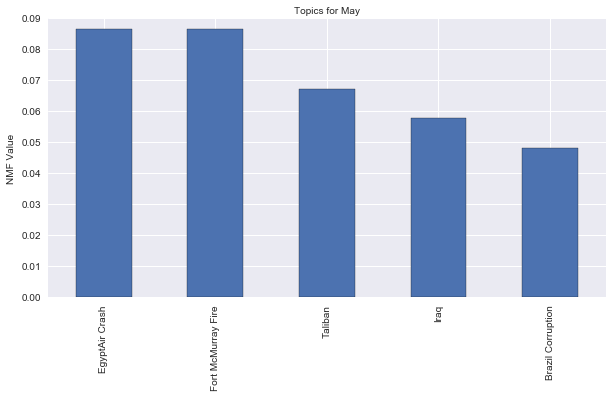

In [18]:
# El Chapo
# Orlando Shooting
by_month.iloc[4].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for May')

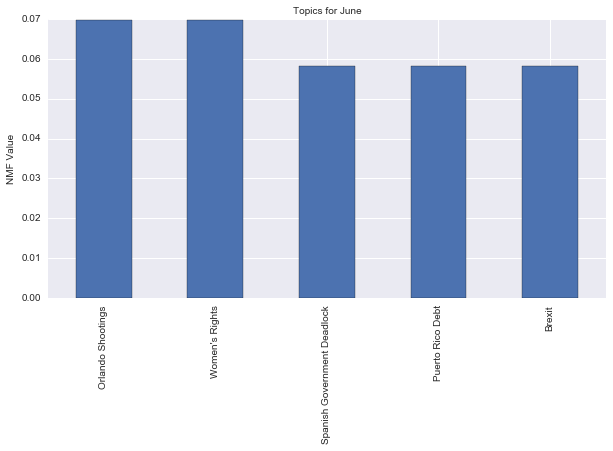

In [19]:
# El Chapo
# Orlando Shooting
by_month.iloc[5].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for June')

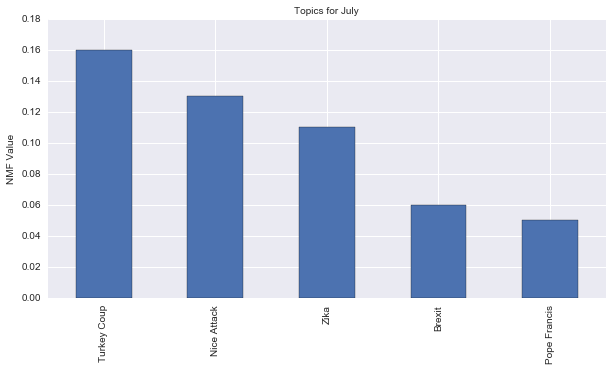

In [20]:
# El Chapo
# Orlando Shooting
by_month.iloc[6].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for July')

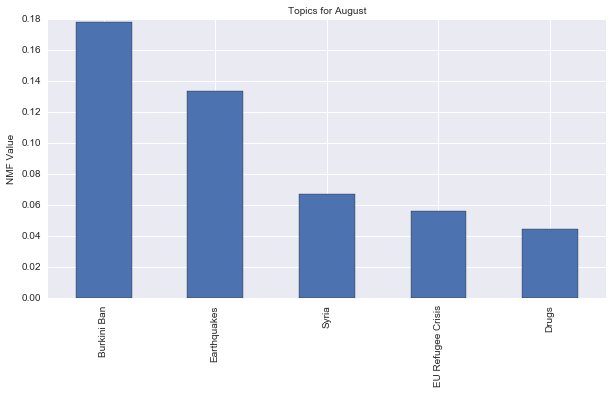

In [23]:
# El Chapo
# Orlando Shooting
by_month.iloc[7].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for August')

# Top Topics for the Year

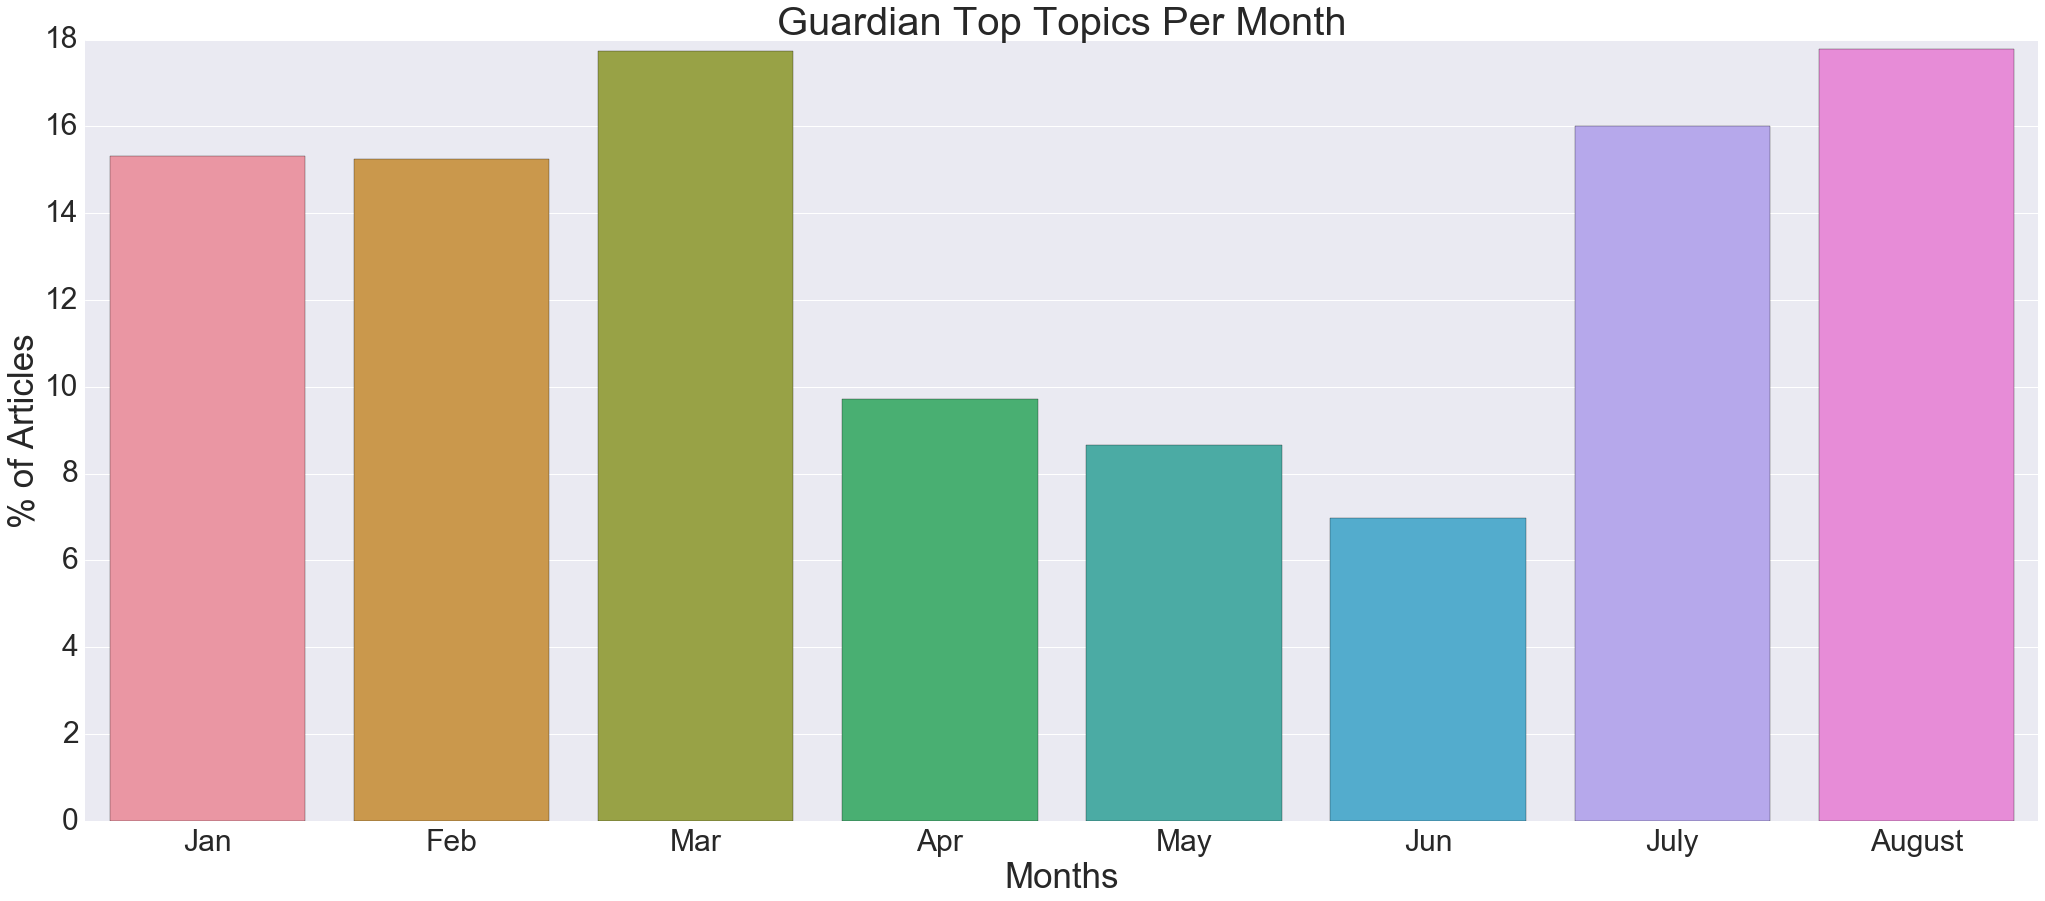

In [25]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "June", "July", 'Aug']

lst = []
topics_ =[]
for i in range(8):
    x = by_month.iloc[i].sort_values(ascending = False).head(1)
    lst.append(x[0]*100)
    topics_.append(x.keys()[0])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "Jun", "July", 'August']
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 25, 'font.size': 25, 'legend.fontsize': 30.0, 'axes.titlesize': 20, "figure.figsize": [35, 14]}
sns.set(rc = rc)
sns.barplot(x = months, y = lst)
plt.title('Guardian Top Topics Per Month', fontsize=40)
plt.xlabel('Months', fontsize=35)
_ = plt.ylabel('% of Articles', fontsize=35)

In [26]:
topics_

['Saudi Arabia',
 'Zika',
 'Brussels Attack',
 'Syria',
 'EgyptAir Crash',
 'Orlando Shootings',
 'Turkey Coup',
 'Burkini Ban']

# Comparing with Other Countries

## NYT

In [17]:
nyt = pd.read_pickle('nyt_month.pkl')

In [26]:
months = ['Jan', 'Feb', 'Mar', 'Apr', "May", "June", 'July', 'Aug']
nyt_lst = []
nyt_topics_ =[]
for i in range(8):
    x = nyt.iloc[i].sort_values(ascending = False).head(1)
    nyt_lst.append(x[0])
    nyt_topics_.append(x.keys()[0])

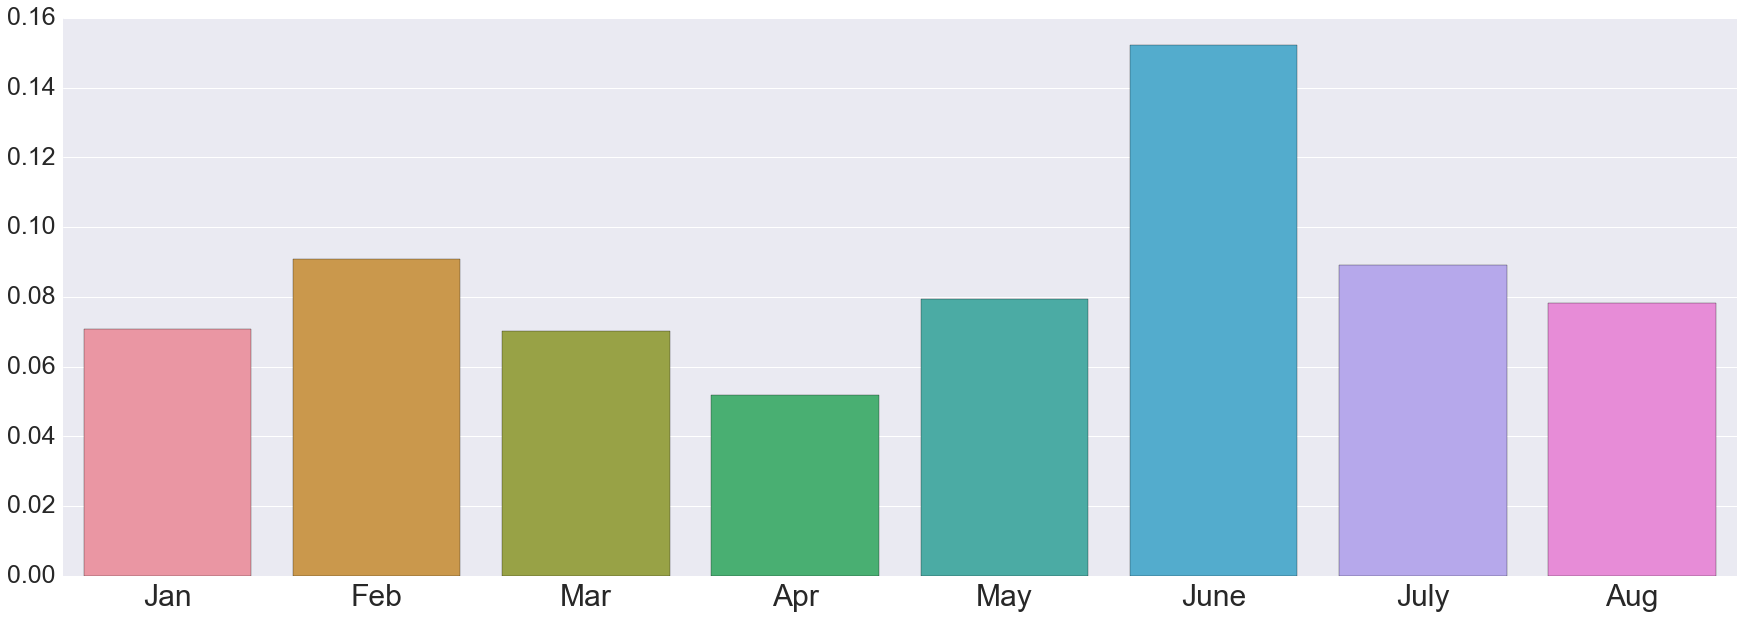

In [27]:
sns.barplot(x = months, y = nyt_lst)

In [28]:
nyt_topics_

['Saudi Arabia',
 'Syria',
 'EU Refugee Crisis',
 'Panama Papers',
 'Brazil Corruption',
 'Brexit',
 'Turkey Coup',
 'Rio Olympics']

In [29]:
nyt_df = pd.DataFrame(nyt_lst, index = nyt_topics_ , columns = ['nyt'])
guardian_df = pd.DataFrame(lst, index = topics_ , columns = ['guardian'])
joint_df = nyt_df.join(guardian_df, how = 'inner')
melt_df = pd.melt(joint_df)
melt_df['month'] = ['Jan', 'Feb', 'July']*2

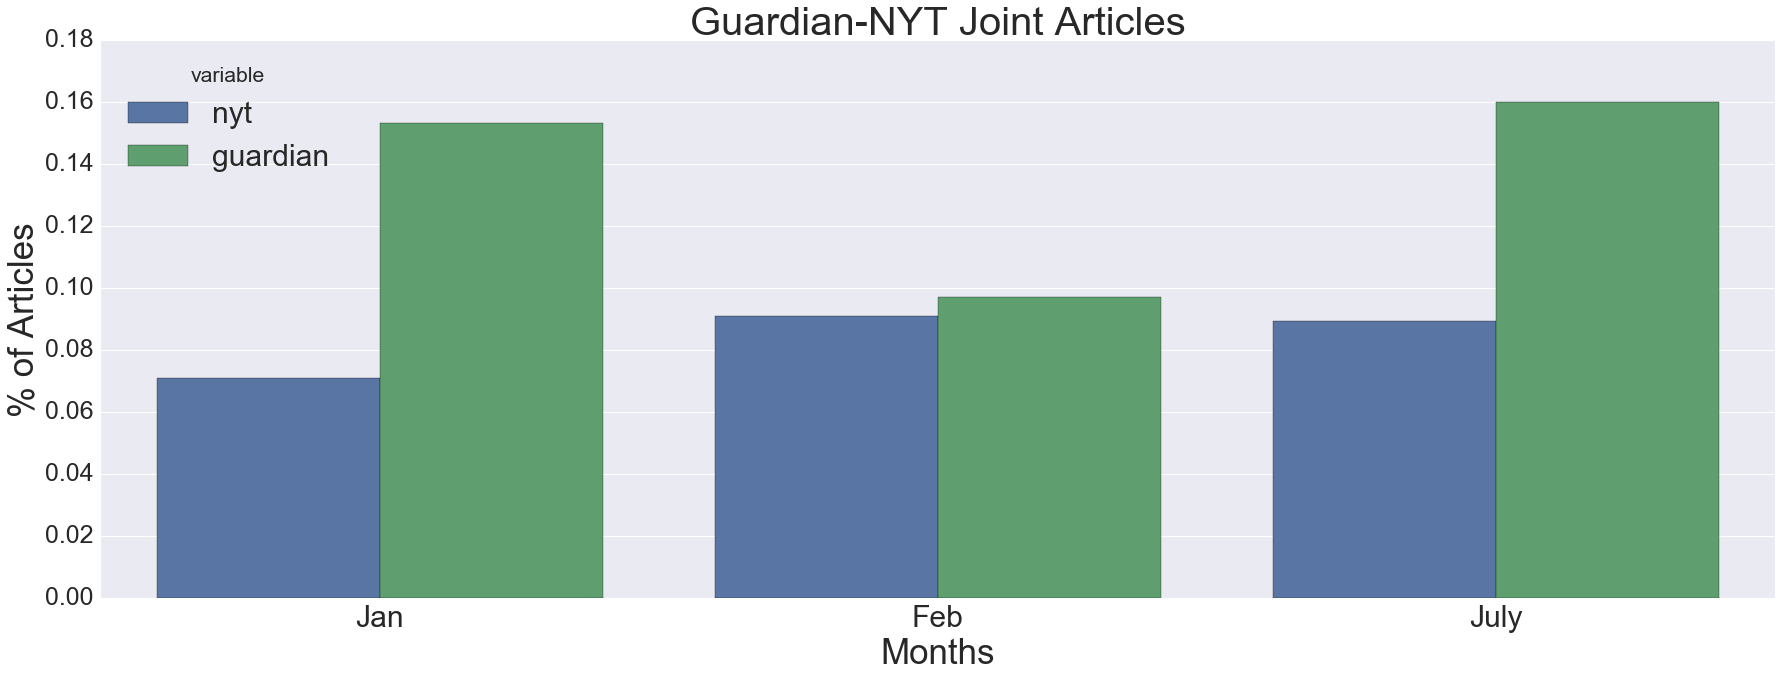

In [30]:
sns.barplot(x = 'month', y = 'value', data = melt_df, hue = 'variable')
plt.title('Guardian-NYT Joint Articles', fontsize=40)
plt.xlabel('Months', fontsize=35)
plt.ylabel('% of Articles', fontsize=35)

In [31]:
joint_df

,nyt,guardian
Saudi Arabia,0.070833,0.153153
Syria,0.090909,0.097087
Turkey Coup,0.089194,0.160000


In [32]:
republica = pd.read_pickle('republica_month.pkl')

In [33]:
republica_lst = []
republica_topics_ =[]
for i in range(8):
    x = republica.iloc[i].sort_values(ascending = False).head(1)
    republica_lst.append(x[0])
    republica_topics_.append(x.keys()[0])

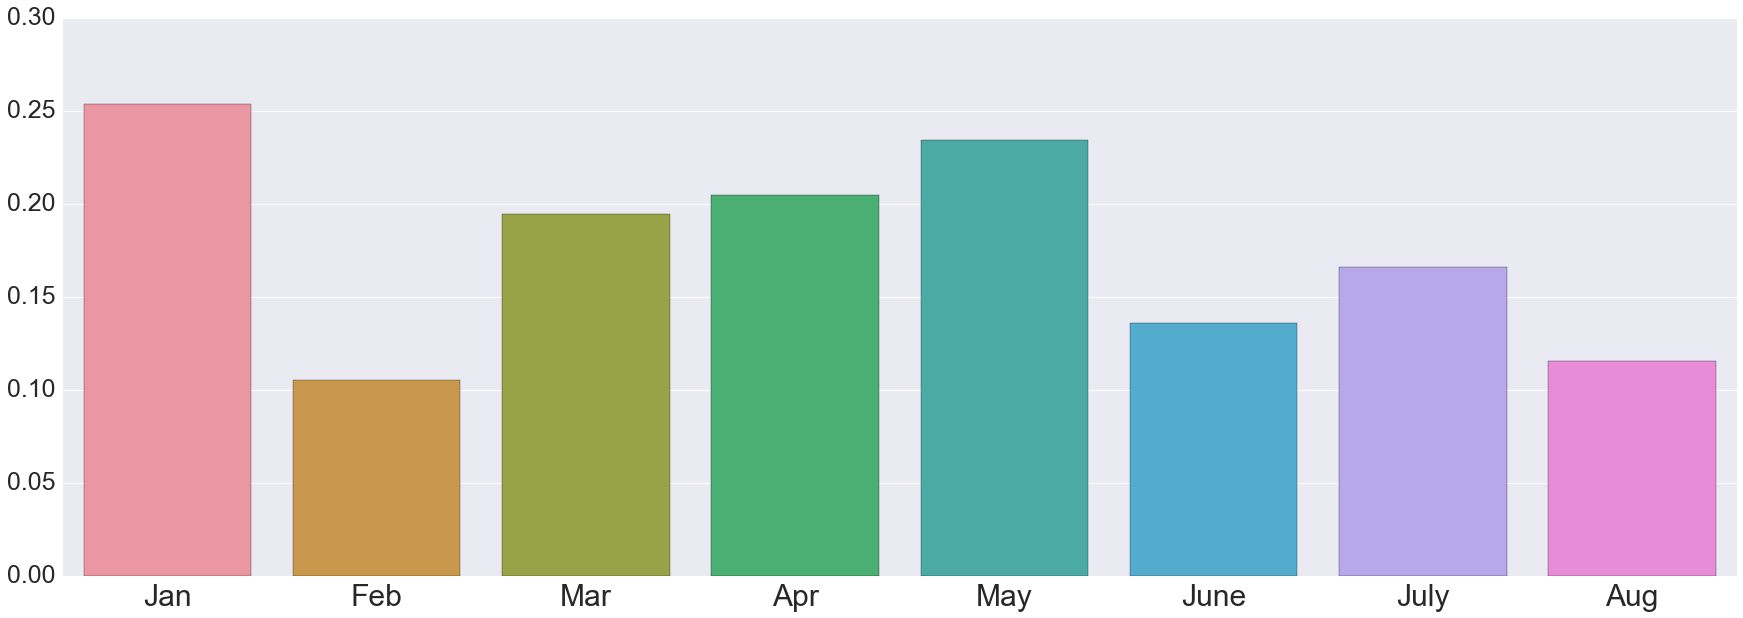

In [35]:
sns.barplot(x = months, y = republica_lst)

In [36]:
republica_topics_

['El Chapo',
 'Pope Francis',
 'Brazil Corruption',
 'Ecuador Earthquake',
 'Brazil Corruption',
 'Brexit',
 'Turkey Coup',
 'U.S. Presidential Election']

In [37]:
republica_df = pd.DataFrame(republica_lst, index = republica_topics_ , columns = ['republica'])
joint_df_republica_nyt = nyt_df.join(republica_df, how = 'inner')
joint_df_republica_nyt = joint_df_republica_nyt.iloc[1:]
republica_nyt_melt_df = pd.melt(joint_df_republica_nyt)
republica_nyt_melt_df['month'] = ['Apr', 'May', 'June']*2

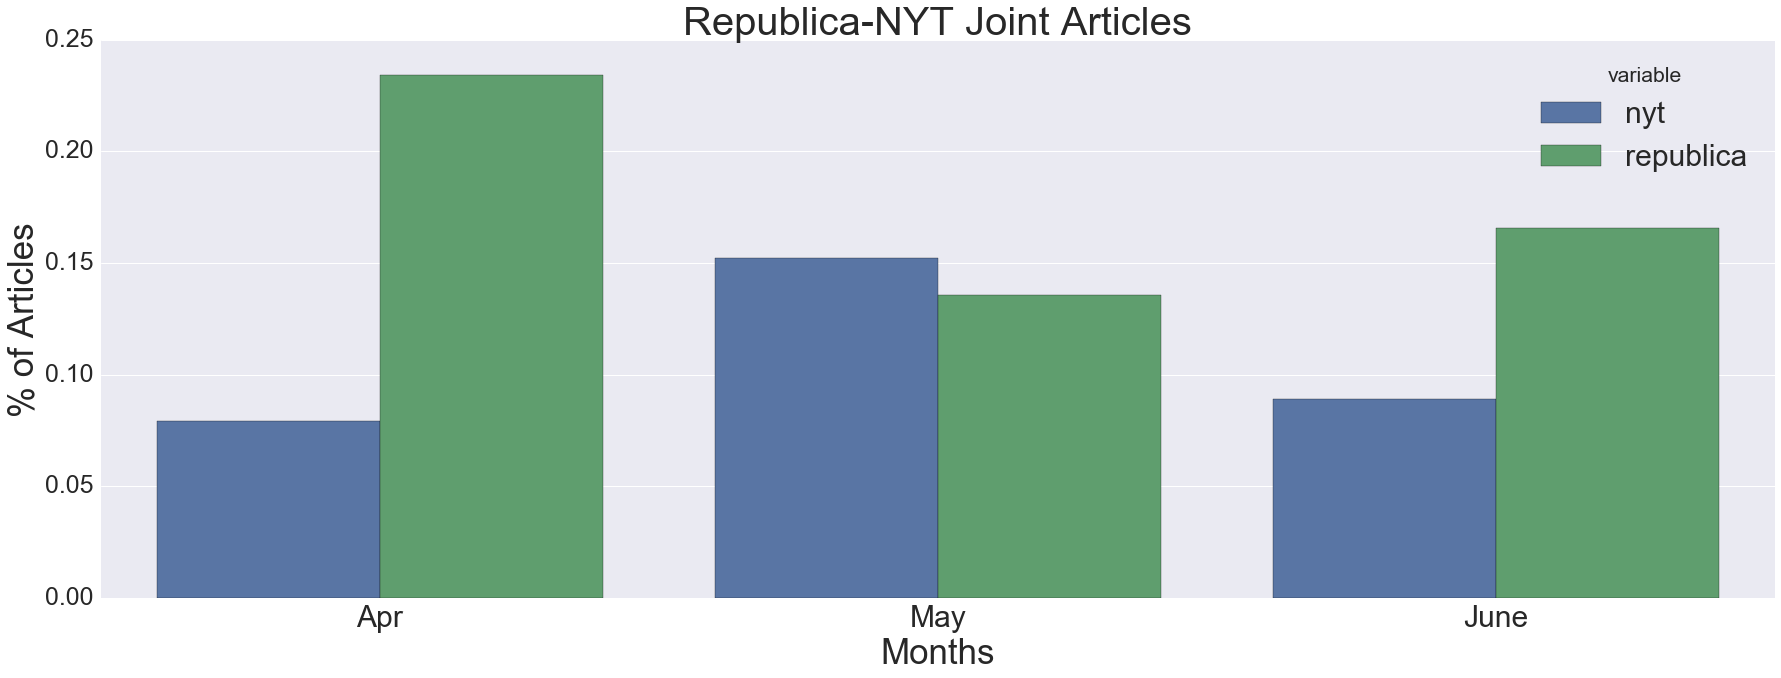

In [38]:
sns.barplot(x = 'month', y = 'value', data = republica_nyt_melt_df, hue = 'variable')
plt.title('Republica-NYT Joint Articles', fontsize=40)
plt.xlabel('Months', fontsize=35)
plt.ylabel('% of Articles', fontsize=35)

In [39]:
joint_df_republica_nyt

,nyt,republica
Brazil Corruption,0.079417,0.234146
Brexit,0.152216,0.135747
Turkey Coup,0.089194,0.165803


In [40]:
nyt_topics_

['Saudi Arabia',
 'Syria',
 'EU Refugee Crisis',
 'Panama Papers',
 'Brazil Corruption',
 'Brexit',
 'Turkey Coup',
 'Rio Olympics']